In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [13]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


C:\Users\TheuriM\AppData\Local\Temp\ipykernel_14068\1526636886.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [20]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [21]:
# Save references to each table
measurement = Base.classes.measurement
station =  Base.classes.station


In [22]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
most_recent_date= session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

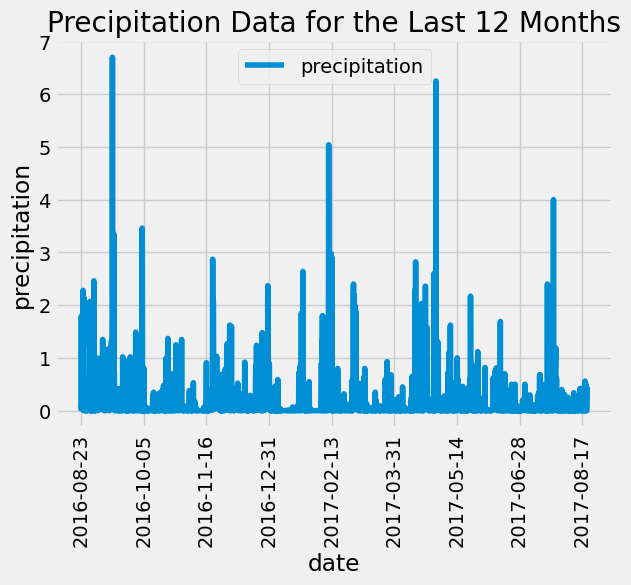

<Figure size 640x480 with 0 Axes>

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
last_year_precipitation=session.query(measurement.date, measurement.prcp).filter(measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_year_precipitation_df=  pd.DataFrame(last_year_precipitation, columns=['date', 'precipitation'])


# Sort the dataframe by date
last_year_precipitation_df=last_year_precipitation_df.sort_values(by='date', ascending=True).dropna()

# Use Pandas Plotting with Matplotlib to plot the data
last_year_precipitation_df.plot(x='date', y='precipitation', rot=90)
plt.title('Precipitation Data for the Last 12 Months')
plt.xlabel('date')
plt.ylabel('precipitation')
plt.show()

#save chart
plt.savefig('Visuals/Precipitation Data for the Last 12 Months.png')

In [33]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_year_precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number of stations in the dataset
station_count = [session.query(station.station).count()]
station_count

[9]

In [37]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_data = active_stations[0][0]

temperature_data = session.query(
    func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)
    ).all()

temperature_data
    

[(53.0, 87.0, 73.09795396419437)]

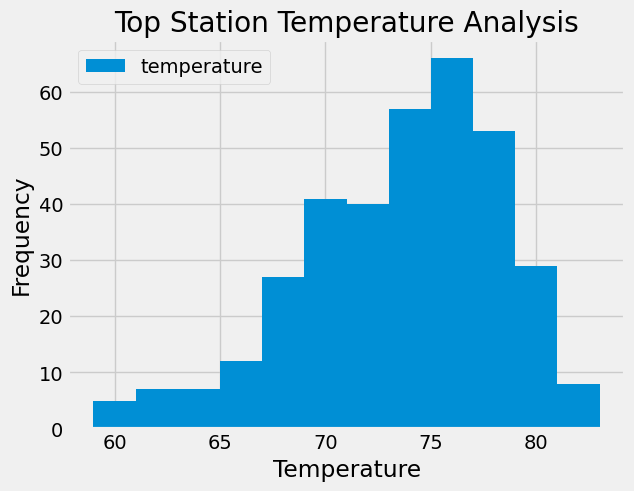

In [45]:
# Using the most active station id
top_station_temps = session.query(
    measurement.tobs).filter(
    measurement.date >= '2016-08-23',
    measurement.station == most_active_station_data
).all()
top_station_temps_df = pd.DataFrame(top_station_temps, columns=['temperature'])
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

top_station_temps_df.plot.hist(bins=12)
plt.title('Top Station Temperature Analysis')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()



# Close Session

In [46]:
# Close Session
session.close()